In [1]:
#imports 
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import imageio
import sys
import easygui

In [60]:
def cartoonify(imgPath):
    """
    Cartoonifies image stored in specified image path
    @param imgPath: path to image file
    """
    #read image 
    img=cv2.imread(imgPath)
    if img is None:
        print("The image file could not be found")
        sys.exit()
    #convert to RGB
    img_cvt_clr=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #resize image
    img_resized=cv2.resize(img_cvt_clr,(960,540))
    #show image 
    grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resized_grey=cv2.resize(grey_img,(960,540))
    #apply median blur
    greyScale_smooth=cv2.medianBlur(grey_img,5)
    resized_smooth=cv2.resize(greyScale_smooth,(960,540))
    #get edges 
    edges=cv2.adaptiveThreshold(greyScale_smooth,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 9, 9)
    resized_edges=cv2.resize(edges,(900,900))
    colorImage = cv2.bilateralFilter(img_cvt_clr, 9, 300, 300)
    resized_colored=cv2.resize(colorImage,(960,540))
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=edges)
    resized_cartoon=cv2.resize(cartoonImage,(960,540))
    plt.imshow(cartoonImage,cmap='gray')
#Allow user to choose image to cartoonify

In [56]:
imgPath='person.jpg'

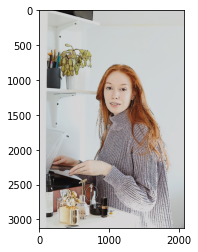

In [61]:
cartoonify(imgPath)